# Linear regression

Model trying to predict value of a variable($y_i$) using a linear relationship with another variable($x$) or variables<br>
$$\hat y_i = b_0 + b_1x$$
where $\hat y_i$ is the predicted value<br>

residual: absolute of (predicted value minus the actual value) $|\hat y_i - y_i|$<br><br>
We're trying to minimise sum of the residuals $\min(\sum_i|\hat y_i - y_i|)$<br>
We could also attribute a squared residual penalty for a model and try to minimise that $\min(\sum_i(\hat y_i - y_i)^2)$<br>

simple linear regression: $y_i = b_0 + b_1x$<br>
multiple linear regression: $y_i = b_0 + b_1x_0 + b_2x_1 + ... b_nx_{n-1}$<br>

Assumptions for modelling with linear regression:
 - linearity: (y should be linearly distributed w.r.t x)
 - independence: there is no relationship between y and residuals
 - normality: the residuals plot w.r.t. x must be normally distributed
 - homoscedasticity: the residual plot w.r.t. x must have equal variances across different sections

### Evaluating linear regression

#### Mean absolute error
$\dfrac{\sum_i^n|\hat y_i - y_i|}{n}$<br>

#### Mean squared error
$\dfrac{\sum_i^n(\hat y_i - y_i)^2}{n}$<br>

#### Root Mean squared error
$\sqrt{\dfrac{\sum_i^n(\hat y_i - y_i)^2}{n}}$<br>

#### $R^2$ - Coff. of determination
$R^2 = 1 - \dfrac{RSS}{TSS}$<br>
where RSS is the sum of squared residuals<br>
$RSS = \sum_{i = 1}^{n}(y_i - \hat y_i)^2$
and TSS is the total sum of squares<br>
$TSS = \sum_{i = 1}^{n}(y_i - \bar y_i)^2$, where $\bar y_i$ is the mean of $y_i$s

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# Dataset:

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [28]:
cols = ["date", "bike_count", "hour", "temp", "humidity", "wind_speed", "visibility", "dew_point", "solar_radiation", "rainfall", "snowfall", "season", "holiday", "functional_day"]
df = pd.read_csv("seoul_bike_demand/SeoulBikeData.csv")
df.columns = cols
df["season"] = df["season"].astype('category').cat.codes
df["holiday"] = (df["holiday"] == "No Holiday").astype(int)
df["functional_day"] = (df["functional_day"] == "Yes").astype(int)
df = df.drop("date", axis = 1)

In [61]:
df8 = df[df["hour"] == 8]
df8 = df8.drop("hour", axis = 1)

df12 = df[df["hour"] == 12]
df12 = df12.drop("hour", axis = 1)

df16 = df[df["hour"] == 16]
df16 = df16.drop("hour", axis = 1)

df20 = df[df["hour"] == 20]
df20 = df20.drop("hour", axis = 1)
df20.head()

df_hour = {8: df8, 12: df12, 16: df16, 20: df20}


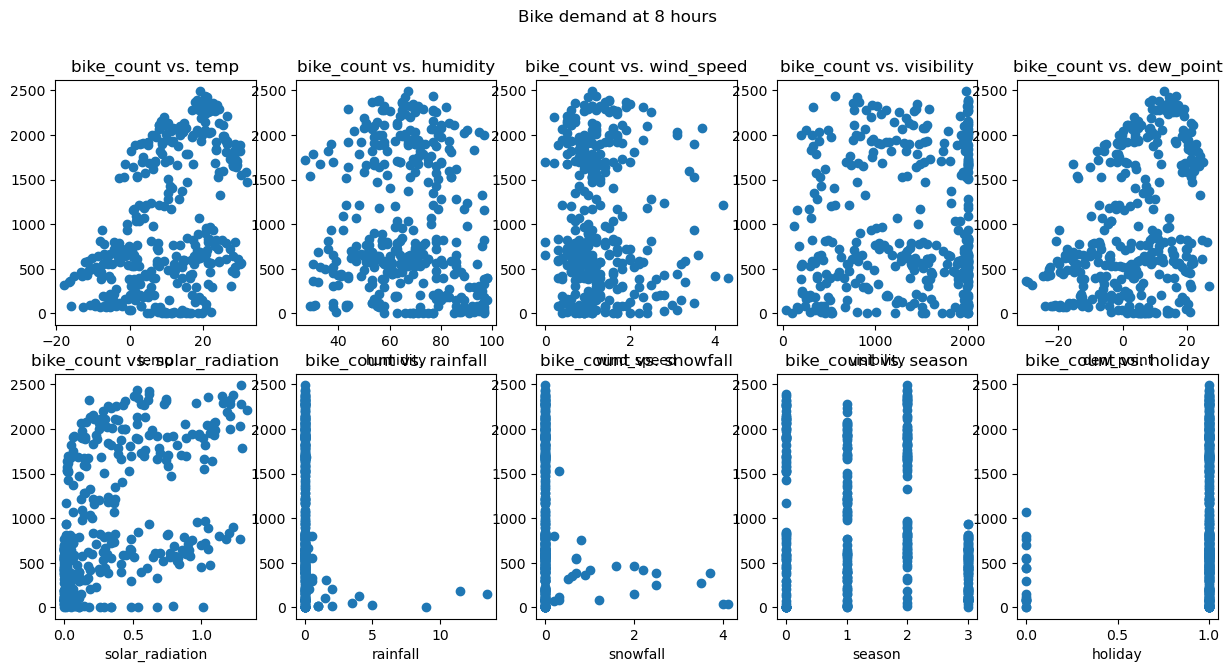

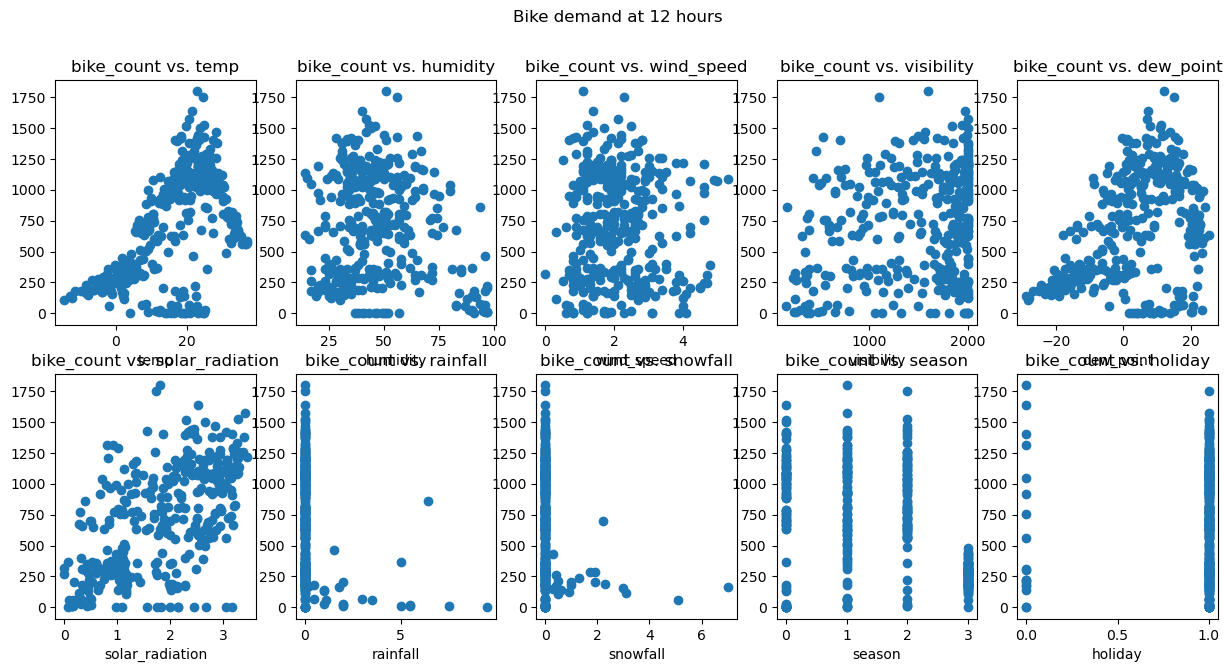

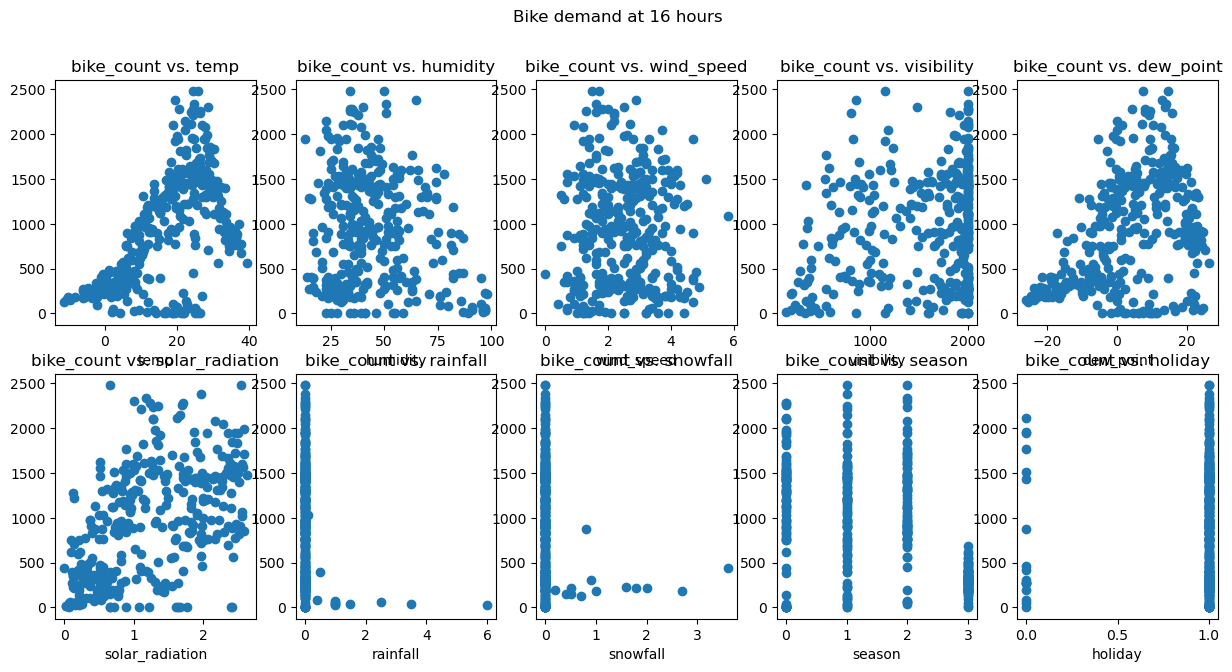

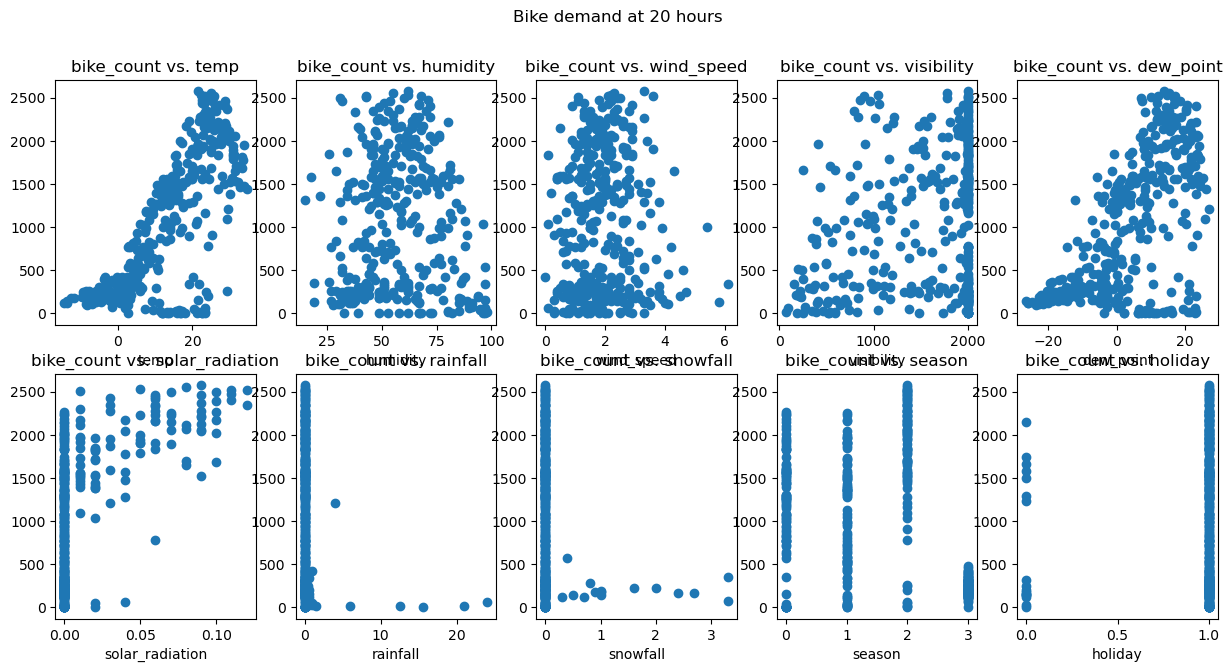

In [71]:
for hour, dfi in df_hour.items():
    fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 7))
    for idx, labl in enumerate(dfi.columns[:-1].drop('bike_count')):
        axs[int(idx / 5)][int(idx % 5)].scatter(x = dfi[labl], y = dfi['bike_count'])
        axs[int(idx / 5)][int(idx % 5)].set_title(f"bike_count vs. {labl}")
        axs[int(idx / 5)][int(idx % 5)].set_xlabel(f"{labl}")
    fig.suptitle(f"Bike demand at {hour} hours")
    plt.show()